In [1]:
import pandas as pd
import logging

from zaps.eda import UniStat, Dist, Olrs, NumAna, CatAna

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from matplotlib import rcParams

rcParams['figure.facecolor'] = (0,0,0,0)
rcParams['figure.autolayout'] = True
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

### KDD 98 Dataset

In [2]:
# Load
cols = ['AGE', 'MAXRAMNT', 'TIMELAG', 'TCODE', 'RAMNT_18', 'RAMNT_19', 'ETH12', 'RAMNT_9', 'AFC3', 'AVGGIFT', 'HC13', 
        'HHAS1', 'OCC4', 'ZIP', 'OSOURCE', 'RFA_16', 'RFA_18', 'RFA_17', 'RFA_22', 'RFA_6', 'RFA_8', 'DOMAIN', 'RDATE_15', 
        'WEALTH1', 'TARGET_B']

df = pd.read_csv('DataSets/cup98LRN.txt', usecols = cols)
target = 'TARGET_B' # Imbalanced binary target
  
df.head()

OSOURCE  TCODE    ZIP DOMAIN   AGE  WEALTH1  ETH12  HHAS1  OCC4  AFC3  ...  \
0     GRI      0  61081     T2  60.0      NaN      0     28    13     0  ...   
1     BOA      1  91326     S1  46.0      9.0      0      6    21     0  ...   
2     AMH      1  27017     R2   NaN      1.0      0     28     6     0  ...   
3     BRY      0  95953     R2  70.0      4.0      0     22     6     0  ...   
4              0  33176     S2  78.0      2.0      0     35     6     1  ...   

   RFA_18 RFA_22 RDATE_15 RAMNT_9 RAMNT_18 RAMNT_19 MAXRAMNT  TIMELAG  \
0     S4E    S4E   9505.0     NaN      NaN      NaN     12.0      4.0   
1            N1E      NaN    25.0      NaN      NaN     25.0     18.0   
2     S4D    S4D      NaN     NaN      8.0      NaN     16.0     12.0   
3     S2D    A1D      NaN     NaN      NaN      NaN     11.0      9.0   
4     A2D    I4E      NaN     NaN      NaN      NaN     15.0     14.0   

     AVGGIFT  TARGET_B  
0   7.741935         0  
1  15.666667         0  
2   7.481481         0  
3   6.812500         0  
4   6.864865         0  

[5 rows x 25 columns]

In [3]:
# univariate stats - highlighting skewed numeric features and rare categories 
u_s = UniStat(df)

num_cols, cat_cols, dup_df = u_s.peek()

[zaps] **INFO** Missing values in categorical columns will be considered as an additional 'missing' level when calculating cardinality and rare levels percent


  0%|          | 0/7 [00:00<?, ?it/s]

'** Data Summary **'

'** Univariate stats - Numeric Features **'

'** Univariate stats - Categorical Features **'

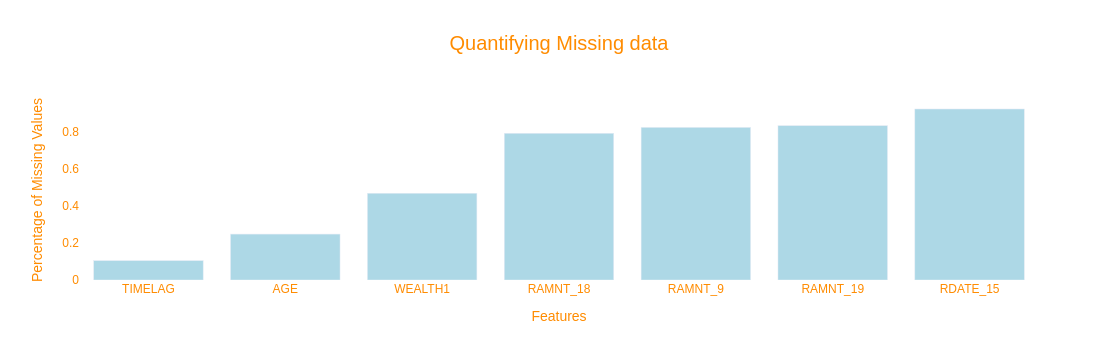

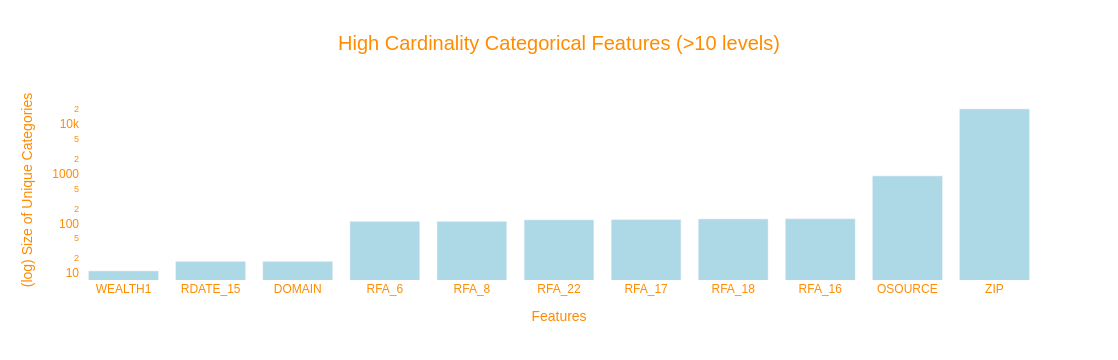

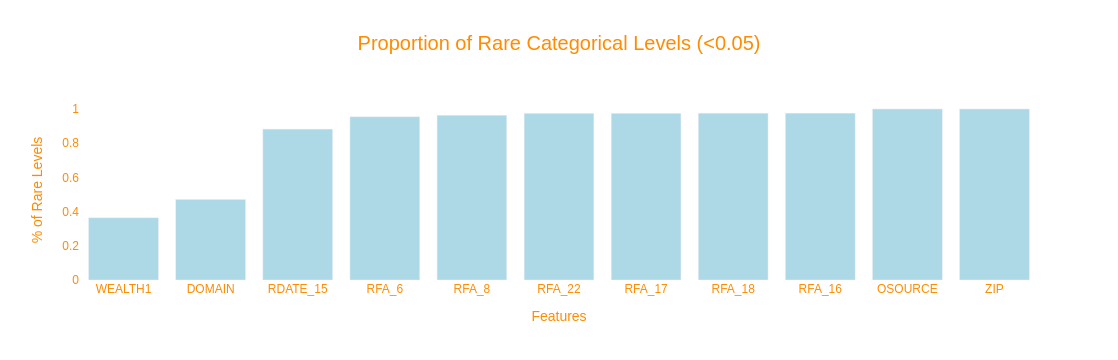

In [4]:
# visualizing data problems
u_s.stats_plot()

[zaps] **INFO** Columns are assumed to be Numeric. If not correct, please manually set 'cat_cols' parameter


Plotting Feature Distribution....:   0%|          | 0/13 [00:00<?, ?it/s]

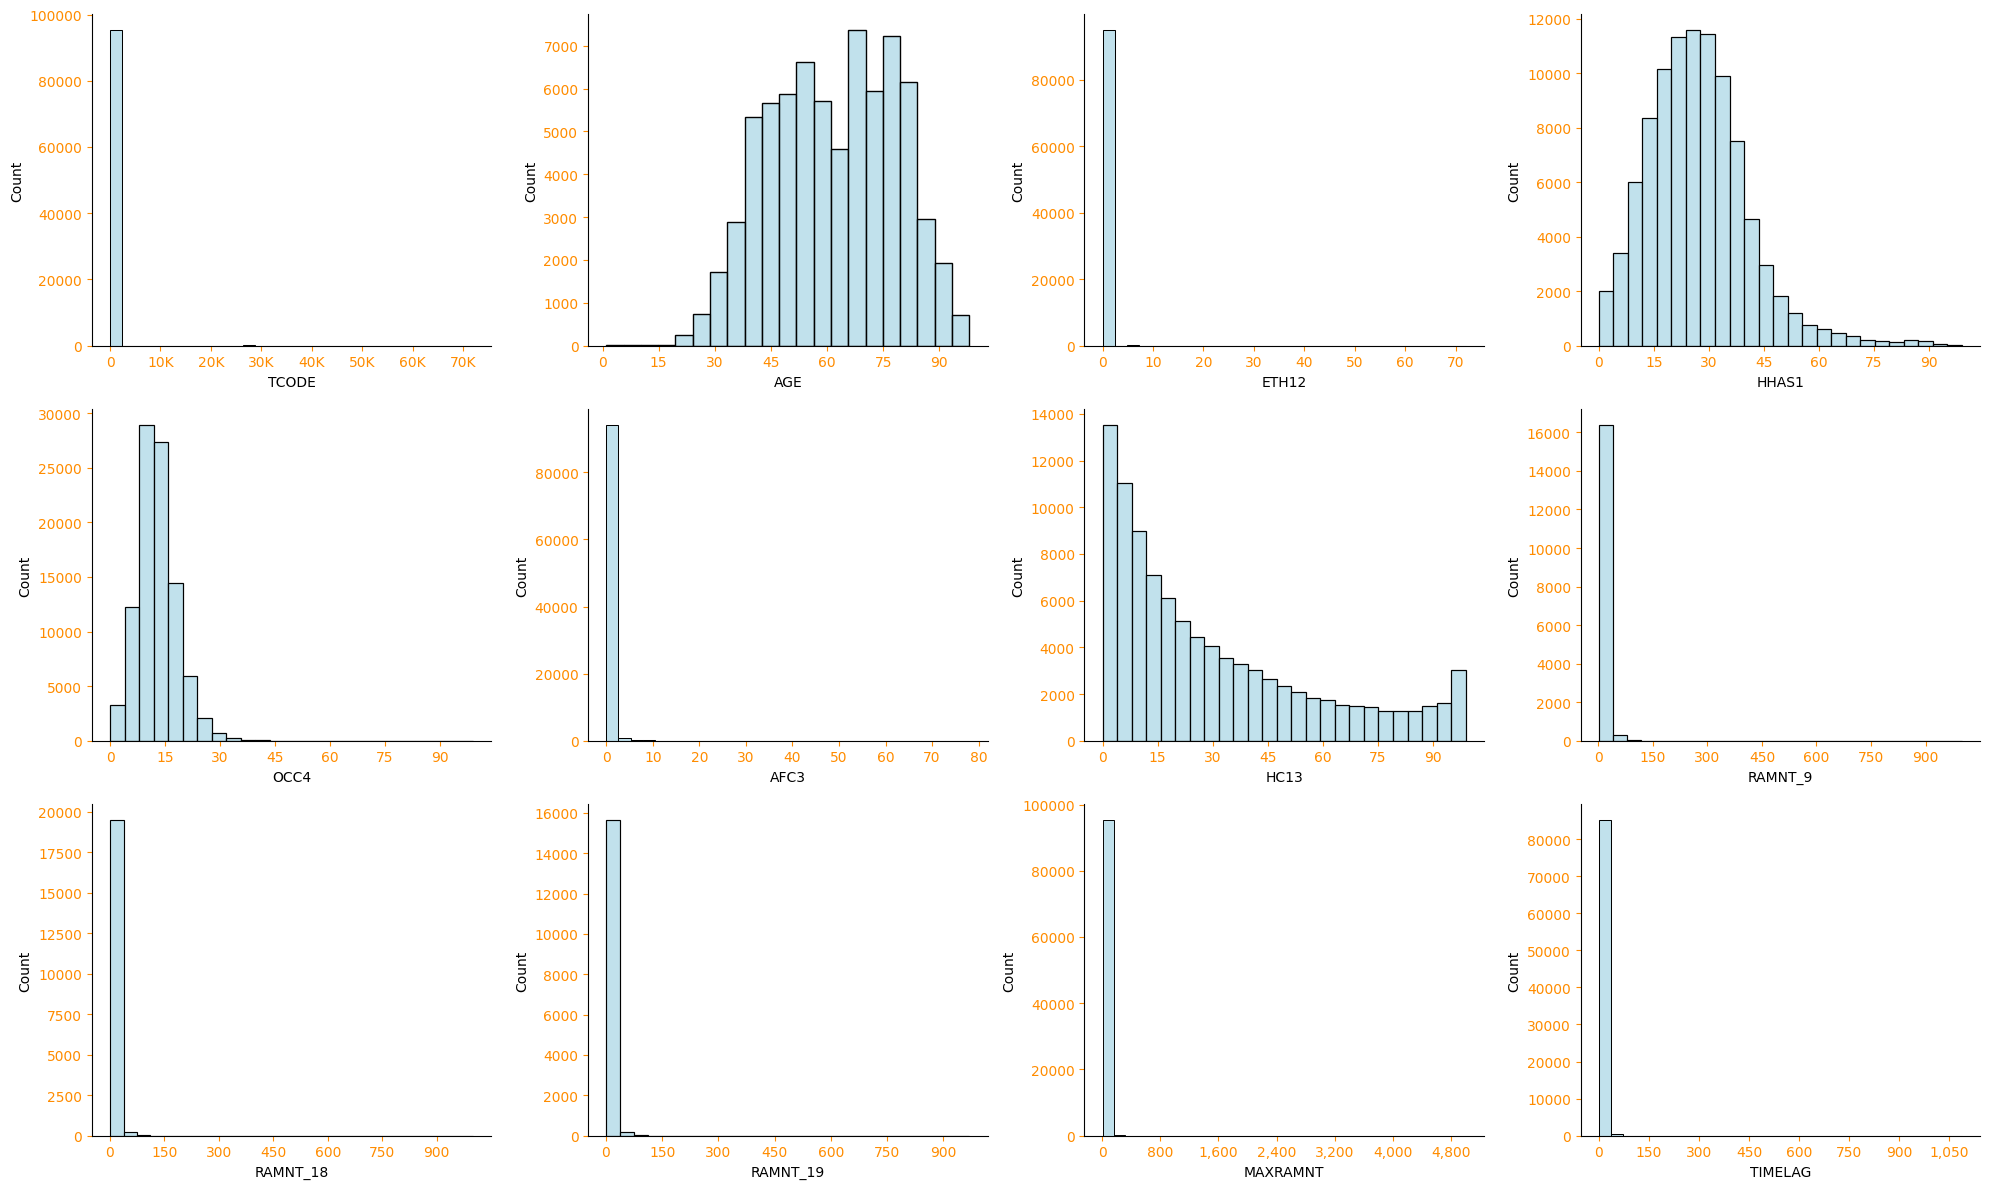

[zaps] **INFO** 1 out of 13 features remaining.


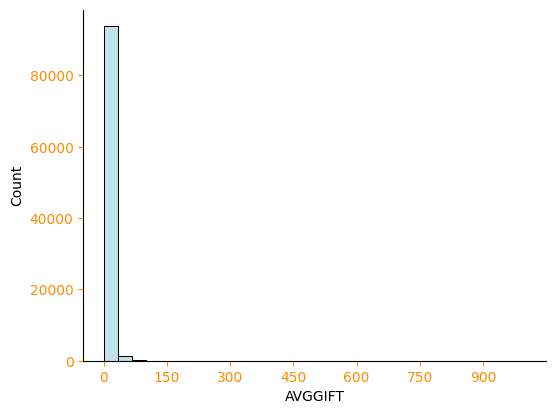

In [5]:
# plotting numeric distributions - Histograms iterative plotting with no user input
Dist(df = df, cols = num_cols, silent = True).hs()

[zaps] **INFO** Columns are assumed to be Categorical. If not correct, please manually set 'cat_cols' parameter


Capturing Frequent Levels....:   0%|          | 0/12 [00:00<?, ?it/s]

[zaps] **WARNING** 2 out of 12 Features Will Not Be Analyzed Being Dominated By Rare Levels. This behaviour is controled by 'rare_thresh' parameter


Plotting Feature Distribution....:   0%|          | 0/10 [00:00<?, ?it/s]

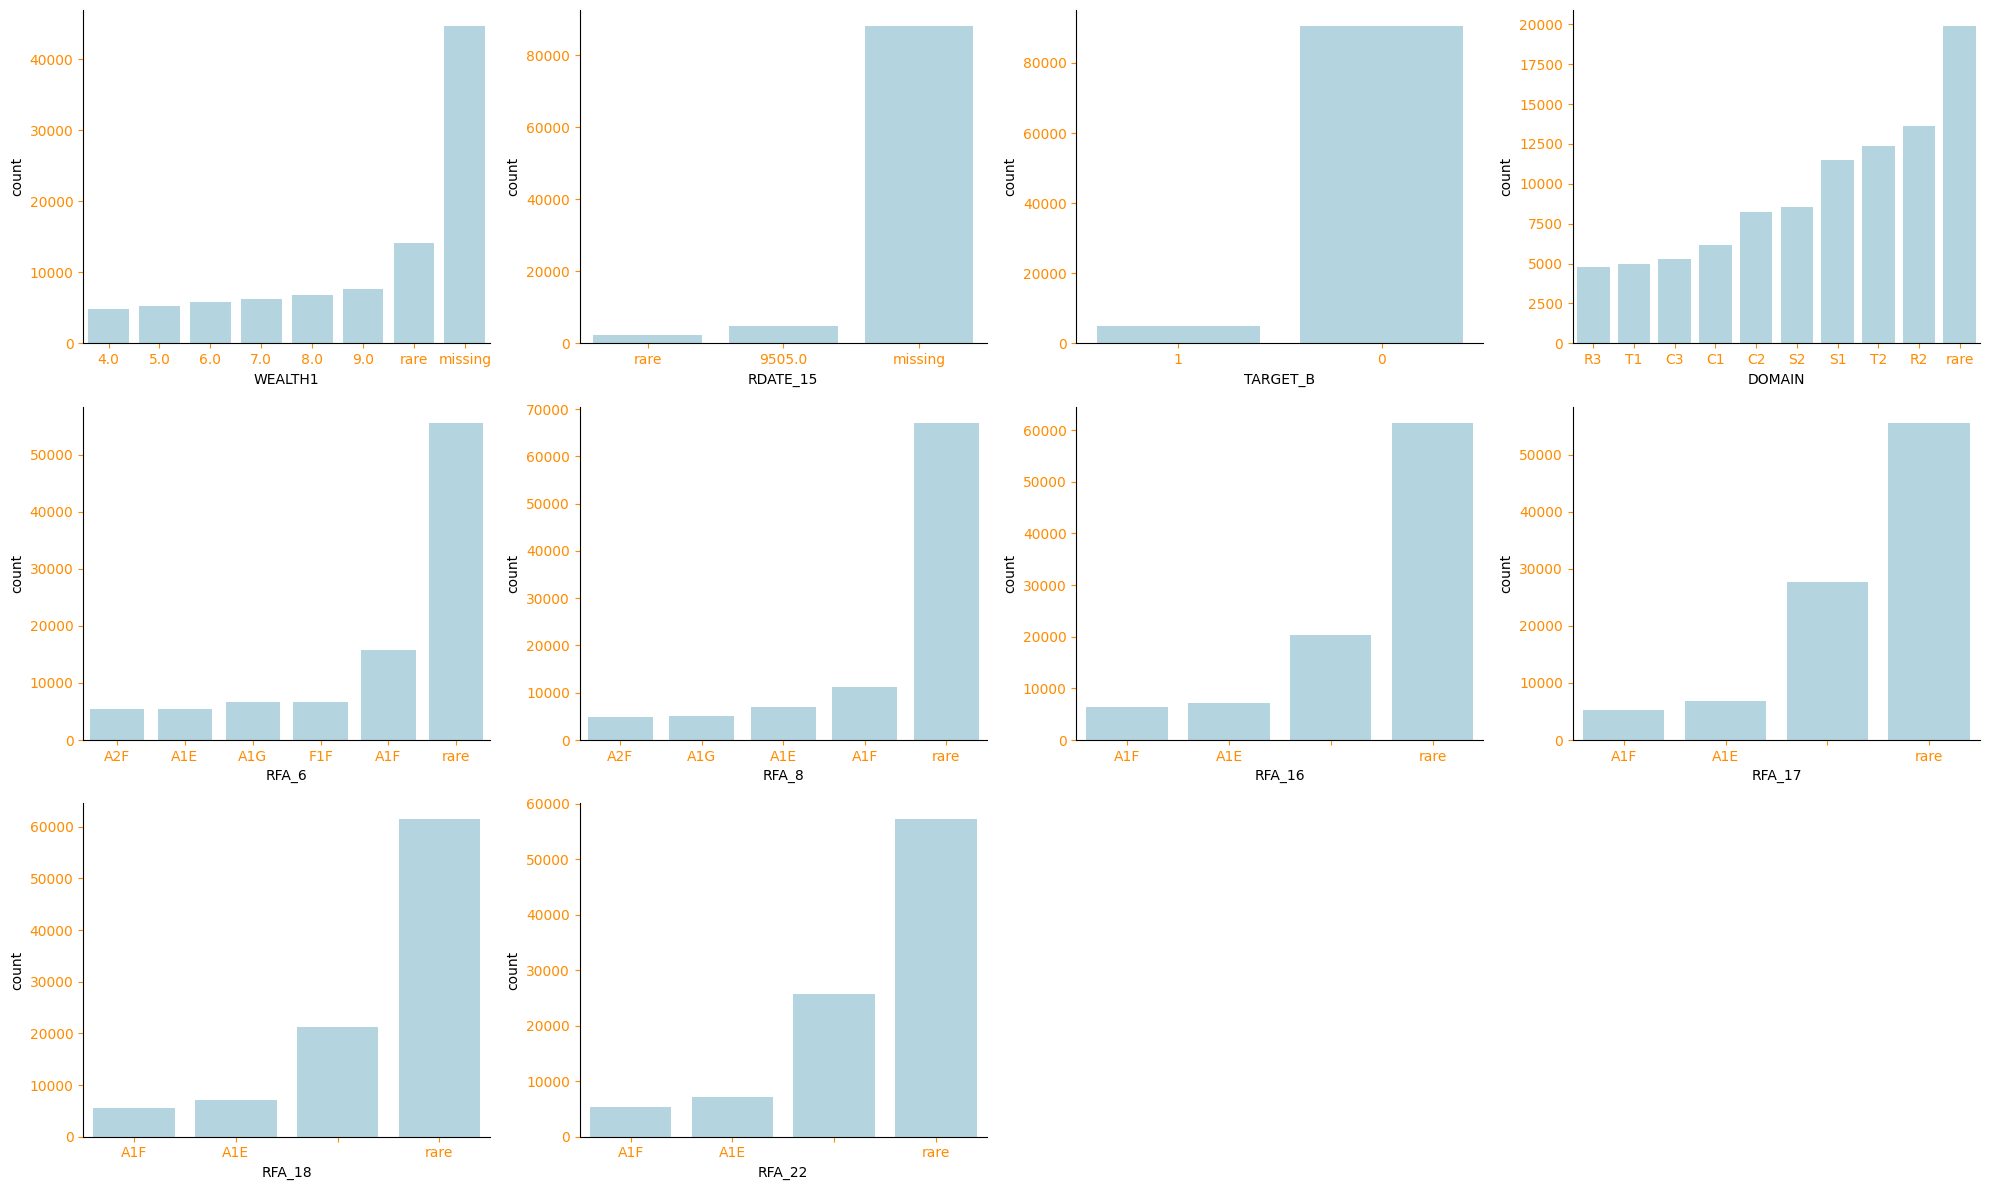

In [6]:
# plotting categorical distributions - Count plots highlighting `rare` and `missing` categories
Dist(df = df, cols = cat_cols).cp()

In [7]:
# confirm ploted categories
df['WEALTH1'].value_counts(dropna = False, normalize = True)

WEALTH1
NaN    0.468830
9.0    0.079497
8.0    0.071196
7.0    0.064960
6.0    0.061051
5.0    0.055339
4.0    0.050413
3.0    0.044407
2.0    0.042814
1.0    0.036201
0.0    0.025290
Name: proportion, dtype: float64

### Iris Dataset

In [2]:
# Load
df = pd.read_csv('DataSets/iris.csv')
target = 'target_' # string multiclass target
col= 'sepal length (cm)'

df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa

In [3]:
# univariate stats
u_s = UniStat(df, hide_p_bar = True)

num_cols, cat_cols, dup_df = u_s.peek(disp_res = False)

[zaps] **INFO** Missing values in categorical columns will be considered as an additional 'missing' level when calculating cardinality and rare levels percent


[zaps] **INFO** Columns are assumed to be Numeric. If not correct, please manually set 'cat_cols' parameter


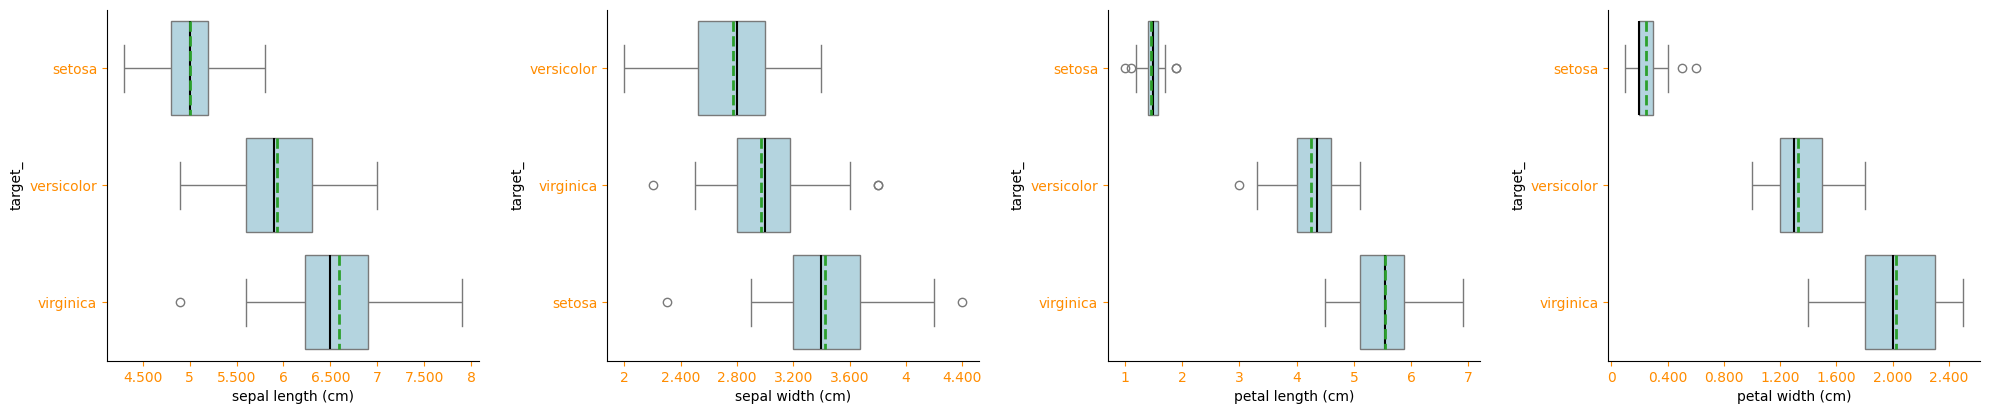

In [10]:
# plotting distributions - box plots
Dist(df = df, cols = num_cols, target = target, hide_p_bar = True).bo()

In [4]:
# outliers: identifying and capping using different methods
__ = Olrs(
          num_cols,
          mapping = {col: ('iqr', 1.5)}, # no outliers at that range
          method = 'q',
          hide_p_bar = True
)

trans_df = __.fit_transform(df)

display("transformed Data - No change to Sepal Length ", trans_df.head(), 
        "Original column", trans_df[col].describe(), 
        "Capping threshold", __.z_thrsh_df_)

'transformed Data - No change to Sepal Length '

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_  sepal width (cm)_b_winso  petal length (cm)_b_winso  \
0       0  setosa                       3.5                        1.4   
1       0  setosa                       3.0                        1.4   
2       0  setosa                       3.2                        1.3   
3       0  setosa                       3.1                        1.5   
4       0  setosa                       3.6                        1.4   

   petal width (cm)_b_winso  
0                       0.2  
1                       0.2  
2                       0.2  
3                       0.2  
4                       0.2

'Original column'

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64

'Capping threshold'

sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
method                 iqr                q                 q                q
distance               1.5             0.05              0.05             0.05
lower                 3.15            2.345               1.3              0.2
upper                 8.35              3.8               6.1              2.3

[zaps] **INFO** logistic fit will be applied


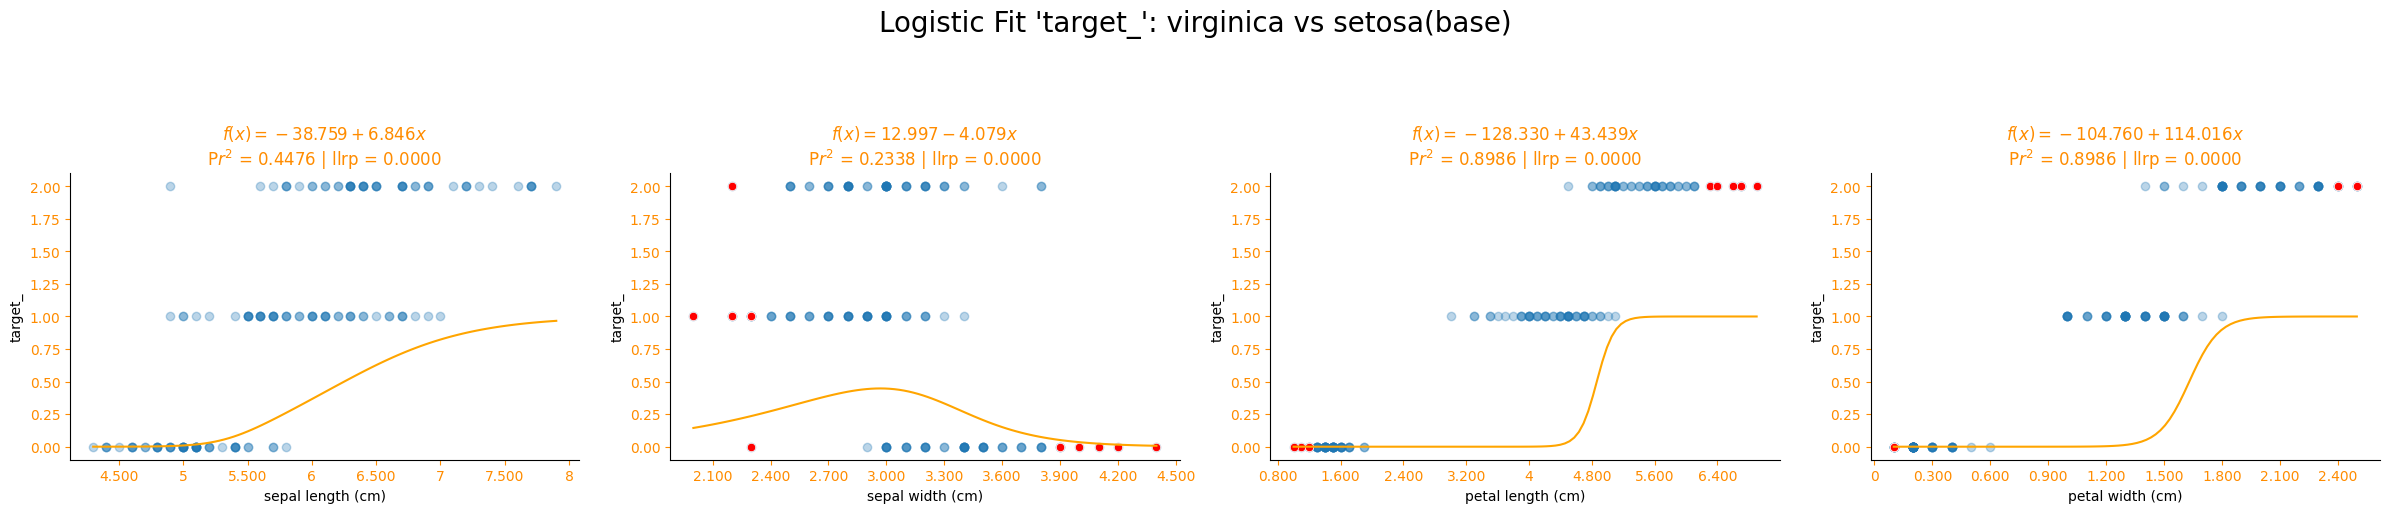

In [5]:
# numeric analysis - fitting regression models and displaying results of last class label vs first(base)
n_a = NumAna(df, num_cols, target, hide_p_bar = True).fit_models()

n_a.vis_fit(olrs_mapping =  __.z_olrs_)

In [13]:
# confirm fit results
n_a.z_fit_results_[col].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:           Q("target_")   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      146
Method:                           MLE   Df Model:                            2
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.4476
Time:                        21:48:00   Log-Likelihood:                -91.034
converged:                       True   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                 9.276e-33
==========================================================================================
        Q("target_")=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -26.0819      4.889     -5.335      0.000     -35.665     -16.499
Q("sepal length (cm)")     4.8157      0.907      5.310      0.000       3.038       6.593
------------------------------------------------------------------------------------------
        Q("target_")=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -38.7590      5.691     -6.811      0.000     -49.913     -27.605
Q("sepal length (cm)")     6.8464      1.022      6.698      0.000       4.843       8.850
==========================================================================================
"""

### Titanic Dataset

In [14]:
# disable basic logging
logging.getLogger('[zaps]').setLevel(logging.WARNING)

# Load
df = pd.read_csv('DataSets/titanic.csv')
target = 'survived'

df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [15]:
# univariate stats and checking duplicates
u_s = UniStat(df, hide_p_bar = True)

num_cols, cat_cols, dup_df = u_s.peek(disp_res = False)

dup_df

survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
64          0       1  male   NaN      0      0  27.7208        C   First   
295         0       1  male   NaN      0      0  27.7208        C   First   
144         0       2  male  18.0      0      0  11.5000        S  Second   
757         0       2  male  18.0      0      0  11.5000        S  Second   
658         0       2  male  23.0      0      0  13.0000        S  Second   
..        ...     ...   ...   ...    ...    ...      ...      ...     ...   
838         1       3  male  32.0      0      0  56.4958        S   Third   
643         1       3  male   NaN      0      0  56.4958        S   Third   
692         1       3  male   NaN      0      0  56.4958        S   Third   
65          1       3  male   NaN      1      1  15.2458        C   Third   
709         1       3  male   NaN      1      1  15.2458        C   Third   

     who  adult_male deck  embark_town alive  alone  
64   man        True  NaN    Cherbourg    no   True  
295  man        True  NaN    Cherbourg    no   True  
144  man        True  NaN  Southampton    no   True  
757  man        True  NaN  Southampton    no   True  
658  man        True  NaN  Southampton    no   True  
..   ...         ...  ...          ...   ...    ...  
838  man        True  NaN  Southampton   yes   True  
643  man        True  NaN  Southampton   yes   True  
692  man        True  NaN  Southampton   yes   True  
65   man        True  NaN    Cherbourg   yes  False  
709  man        True  NaN    Cherbourg   yes  False  

[160 rows x 15 columns]

Plotting Feature Distribution....:   0%|          | 0/2 [00:00<?, ?it/s]

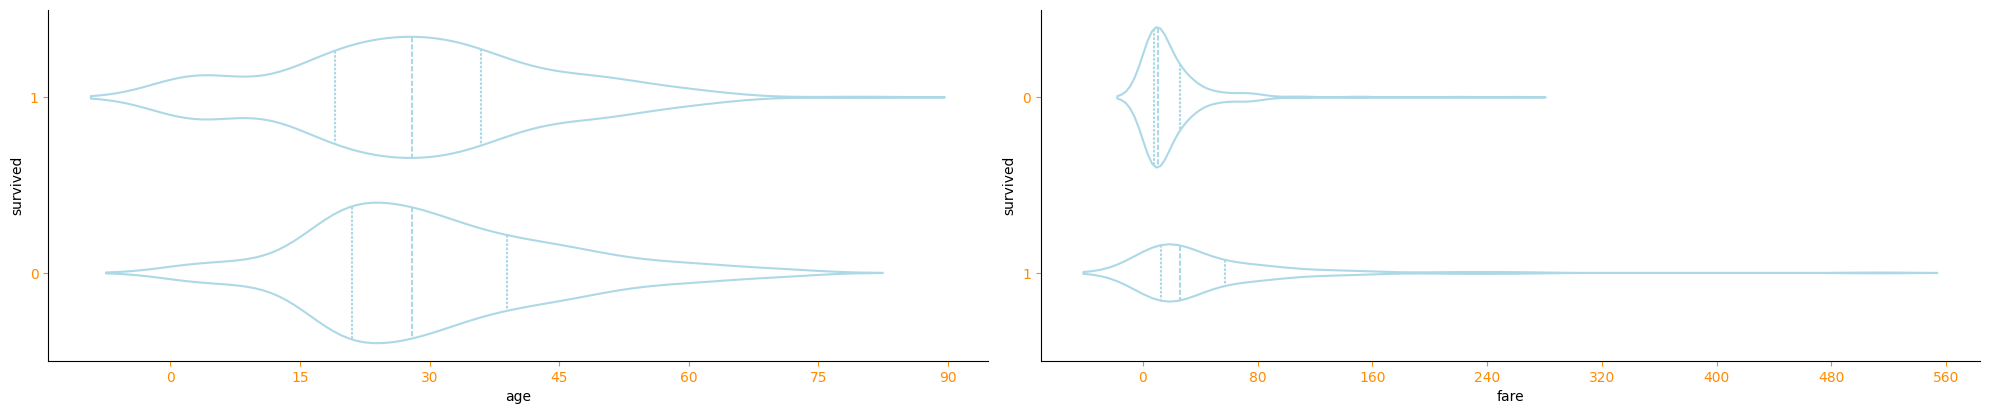

In [16]:
# plotting conditional distributions - Violin plots
Dist(df = df, cols = num_cols, target = target).vi()

In [17]:
# categorical analysis chi2 test of independence - cats vs cats
c_a = CatAna(df, cat_cols, target, hide_p_bar = True)

chi2 = c_a.ana_chi2()

'** Chi2 test of independence results **'

'Note: `True` means Reject Null; categorical variables are dependent **'

In [18]:
# categorical analysis attributes
display(
        "cross tabs", c_a.z_crss_tabs_['deck'],
        "frequent categories", c_a.z_freq_lvls_map_['deck'],
        "transformed Data: labeling `missing` and `rare` categories", c_a.z_df_.head(),
        "Mean variation: Conditional vs Prior", c_a.zefct_df_.head()
)

'cross tabs'

deck       B   C  missing  rare
survived                       
0         12  24      482    31
1         35  35      206    66

'frequent categories'

Index([nan, 'C', 'B'], dtype='object', name='deck')

'transformed Data: labeling `missing` and `rare` categories'

survived pclass     sex   age sibsp parch     fare embarked  class    who  \
0         0      3    male  22.0     1     0   7.2500        S  Third    man   
1         1      1  female  38.0     1     0  71.2833        C  First  woman   
2         1      3  female  26.0     0     0   7.9250        S  Third  woman   
3         1      1  female  35.0     1     0  53.1000        S  First  woman   
4         0      3    male  35.0     0     0   8.0500        S  Third    man   

  adult_male     deck  embark_town alive  alone  
0       True  missing  Southampton    no  False  
1      False        C    Cherbourg   yes  False  
2      False  missing  Southampton   yes   True  
3      False        C  Southampton   yes  False  
4       True  missing  Southampton    no   True

'Mean variation: Conditional vs Prior'

feature    lvl  survived_1     prior      diff     ratio
33        alive    yes    1.000000  0.383838  0.616162  2.605263
15     embarked   rare    1.000000  0.383838  0.616162  2.605263
31  embark_town   rare    1.000000  0.383838  0.616162  2.605263
21          who  woman    0.756458  0.383838  0.372619  1.970771
24         deck      B    0.744681  0.383838  0.360842  1.940090

### Ames Dataset

In [19]:
# disable basic logging
logging.getLogger('[zaps]').setLevel(logging.INFO)

# Load
df = pd.read_csv('DataSets/ames')
target = 'SalePrice'
col = 'LotArea'

df.head()

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
0  909176150        856     126000          30       RL          NaN     7890   
1  905476230       1049     139500         120       RL         42.0     4235   
2  911128020       1001     124900          30  C (all)         60.0     6060   
3  535377150       1039     114000          70       RL         80.0     8146   
4  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0   Pave   NaN      Reg  ...         NaN       0      3   2010      WD    
1   Pave   NaN      Reg  ...         NaN       0      2   2009      WD    
2   Pave   NaN      Reg  ...         NaN       0     11   2007      WD    
3   Pave   NaN      Reg  ...         NaN       0      5   2009      WD    
4   Pave   NaN      Reg  ...         NaN       0     11   2009      WD    

  SaleCondition     GeoRefNo          Prop_Addr   Latitude  Longitude  
0        Normal  909176150.0    436 HAYWARD AVE  42.018564 -93.651619  
1        Normal  905476230.0       3416 WEST ST  42.024855 -93.663671  
2        Normal  911128020.0       320 S 2ND ST  42.021548 -93.614068  
3        Normal  535377150.0   1524 DOUGLAS AVE  42.037391 -93.612207  
4        Normal  534177230.0  2304 FILLMORE AVE  42.044554 -93.631818  

[5 rows x 85 columns]

In [20]:
# univariate stats attributes
u_s = UniStat(df, hide_p_bar = True)

num_cols, cat_cols, dup_df = u_s.peek(disp_res = False)

display(
    "high cardinality cats", 
    u_s.z_hc_data_.sort_values(ascending = False).to_frame().T,
    "feats with missing data",
    u_s.z_miss_data_.sort_values(ascending = False).to_frame().T,
    "cat feats with rare",
    u_s.z_rare_cat_.sort_values('pct_rare_lvls', ascending = False).T,
    "Data Summary",
    u_s.z_summary_
)

[zaps] **INFO** Missing values in categorical columns will be considered as an additional 'missing' level when calculating cardinality and rare levels percent


'high cardinality cats'

Prop_Addr  Neighborhood  MSSubClass  Exterior2nd  Exterior1st  MoSold  \
0       2560            28          16           16           15      12   

   TotRmsAbvGrd  
0            12

'feats with missing data'

PoolQC MiscFeature   Alley   Fence MasVnrType FireplaceQu  \
pct_missing  0.9965      0.9624  0.9349  0.7964     0.6095      0.4812   

            LotFrontage GarageYrBlt GarageQual GarageCond  ... MasVnrArea  \
pct_missing      0.1791        0.05       0.05       0.05  ...     0.0054   

            BsmtHalfBath BsmtFullBath BsmtFinSF2 GarageCars GarageArea  \
pct_missing       0.0008       0.0008     0.0004     0.0004     0.0004   

            Electrical TotalBsmtSF BsmtUnfSF BsmtFinSF1  
pct_missing     0.0004      0.0004    0.0004     0.0004  

[1 rows x 31 columns]

'cat feats with rare'

Prop_Addr SaleType PoolArea Condition2 BsmtFinType2 Functional  \
unique             2560       10       10          8            7          7   
n_rare_lvls        2560        9        9          7            6          6   
pct_rare_lvls       1.0      0.9      0.9      0.875     0.857143   0.857143   

               RoofMatl SaleCondition  BsmtCond   Heating  ... Fireplaces  \
unique                7             6         6         6  ...          5   
n_rare_lvls           6             5         5         5  ...          2   
pct_rare_lvls  0.857143      0.833333  0.833333  0.833333  ...        0.4   

              LotConfig KitchenQual HeatingQC    MoSold PavedDrive  HalfBath  \
unique                5           5         5        12          3         3   
n_rare_lvls           2           2         2         4          1         1   
pct_rare_lvls       0.4         0.4       0.4  0.333333   0.333333  0.333333   

              MasVnrType BsmtExposure BsmtFinType1  
unique                 4            5            7  
n_rare_lvls            1            1            1  
pct_rare_lvls       0.25          0.2     0.142857  

[3 rows x 56 columns]

'Data Summary'

rows  columns  num_feats  cat_feats  high_card_cats  rare_lvl_cats  \
0  2579       85         26         59               7             56   

   n_feats_missing_data  n_inf_feats  duplicates  
0                    31            0           0

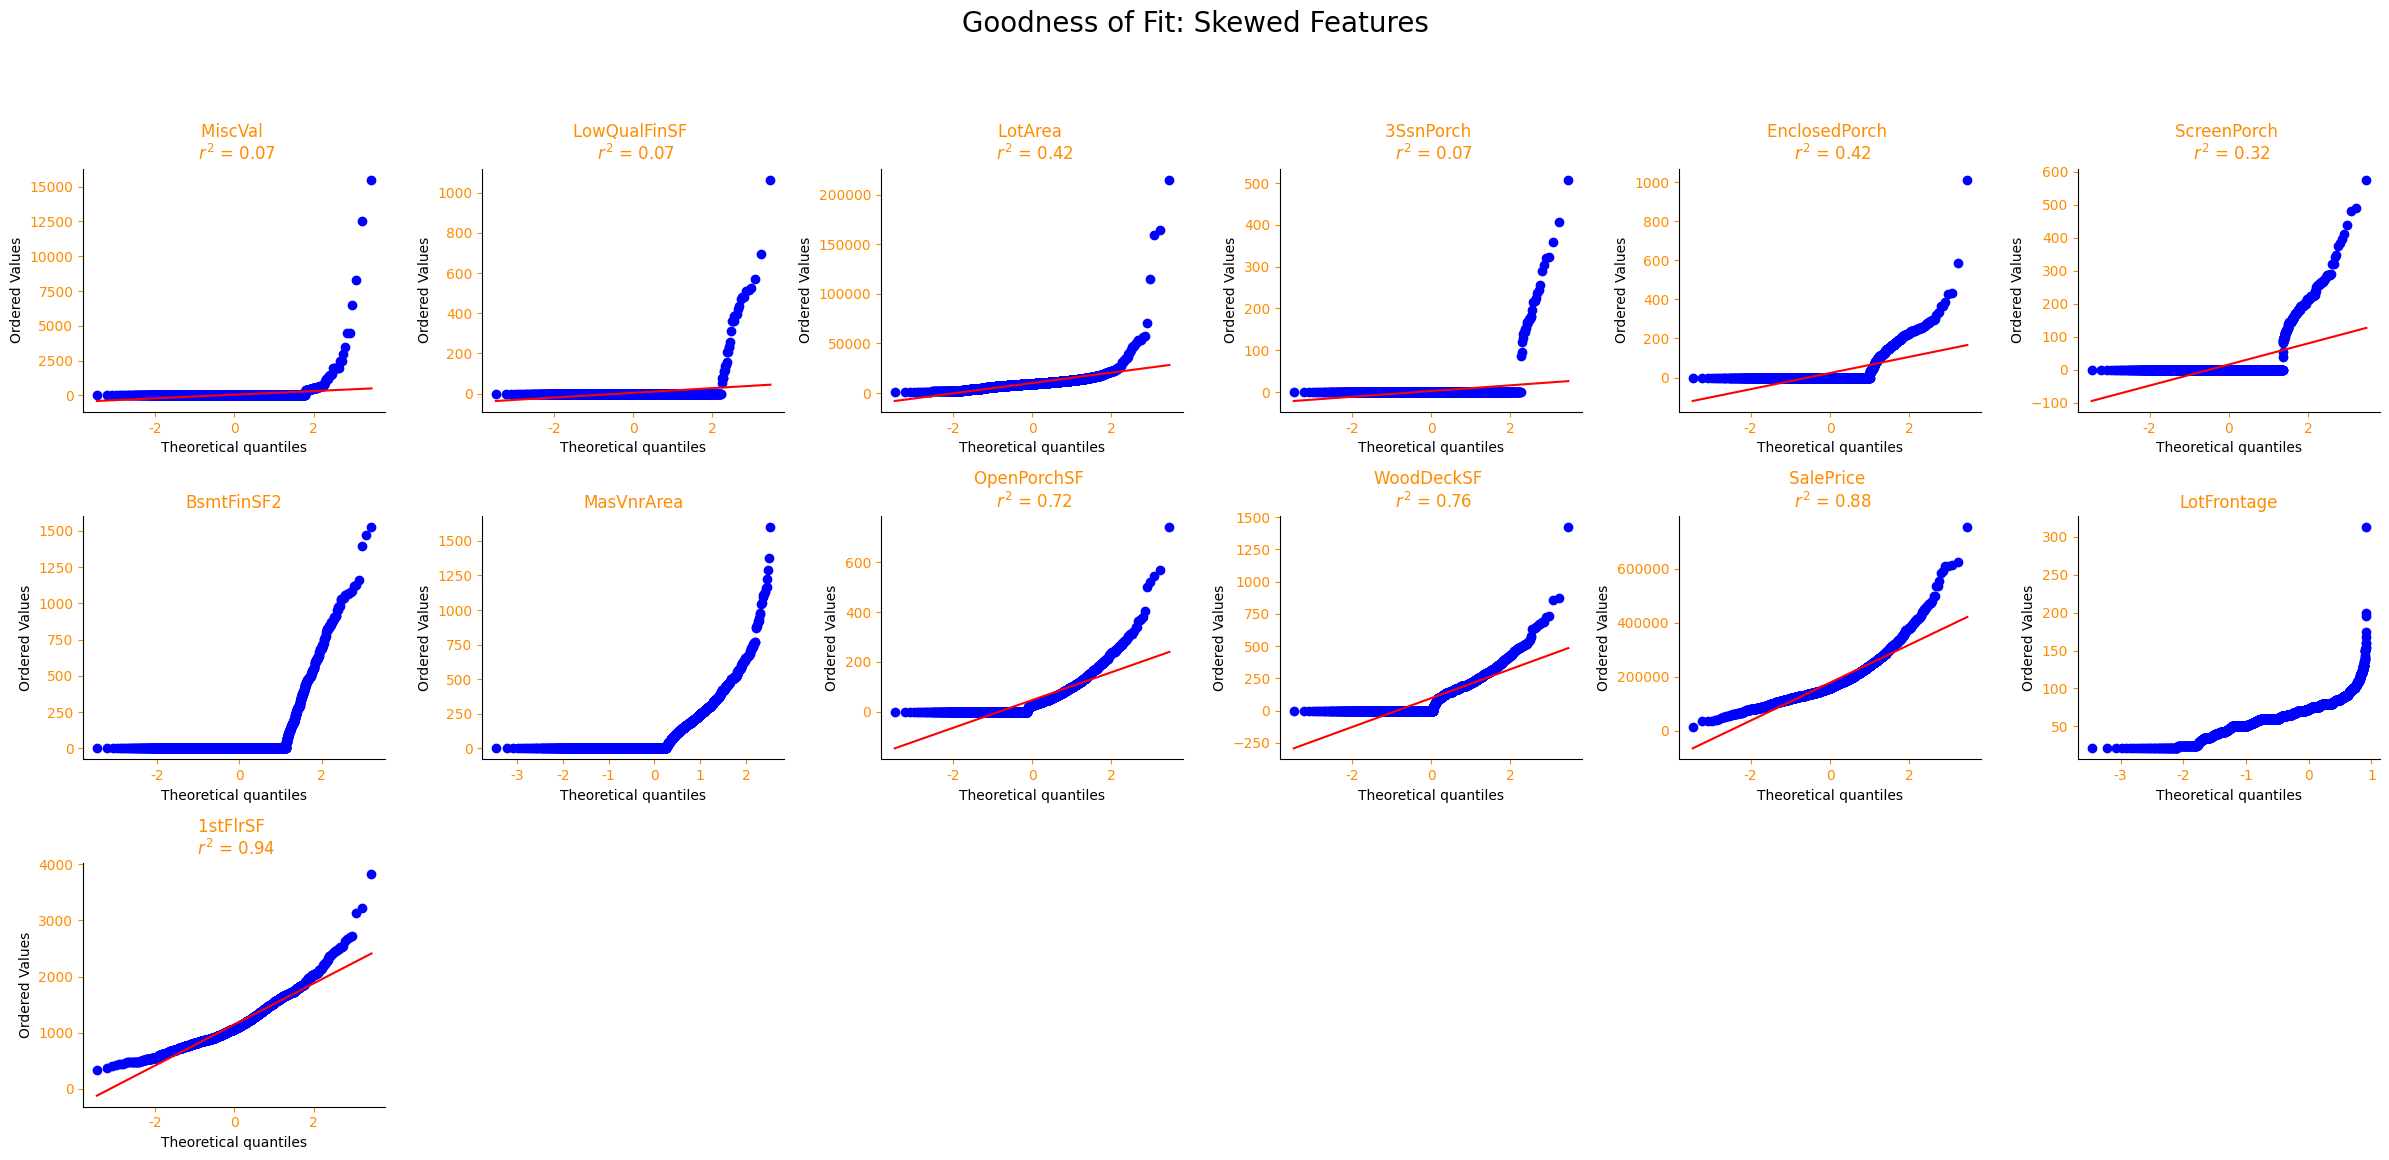

In [21]:
# skewed features goodness of fit: Normal distribution
u_s.skew_plot()

[zaps] **INFO** Columns are assumed to be Categorical. If not correct, please manually set 'cat_cols' parameter
[zaps] **WARNING** 18 out of 59 Features Will Not Be Analyzed Being Dominated By Rare Levels. This behaviour is controled by 'rare_thresh' parameter


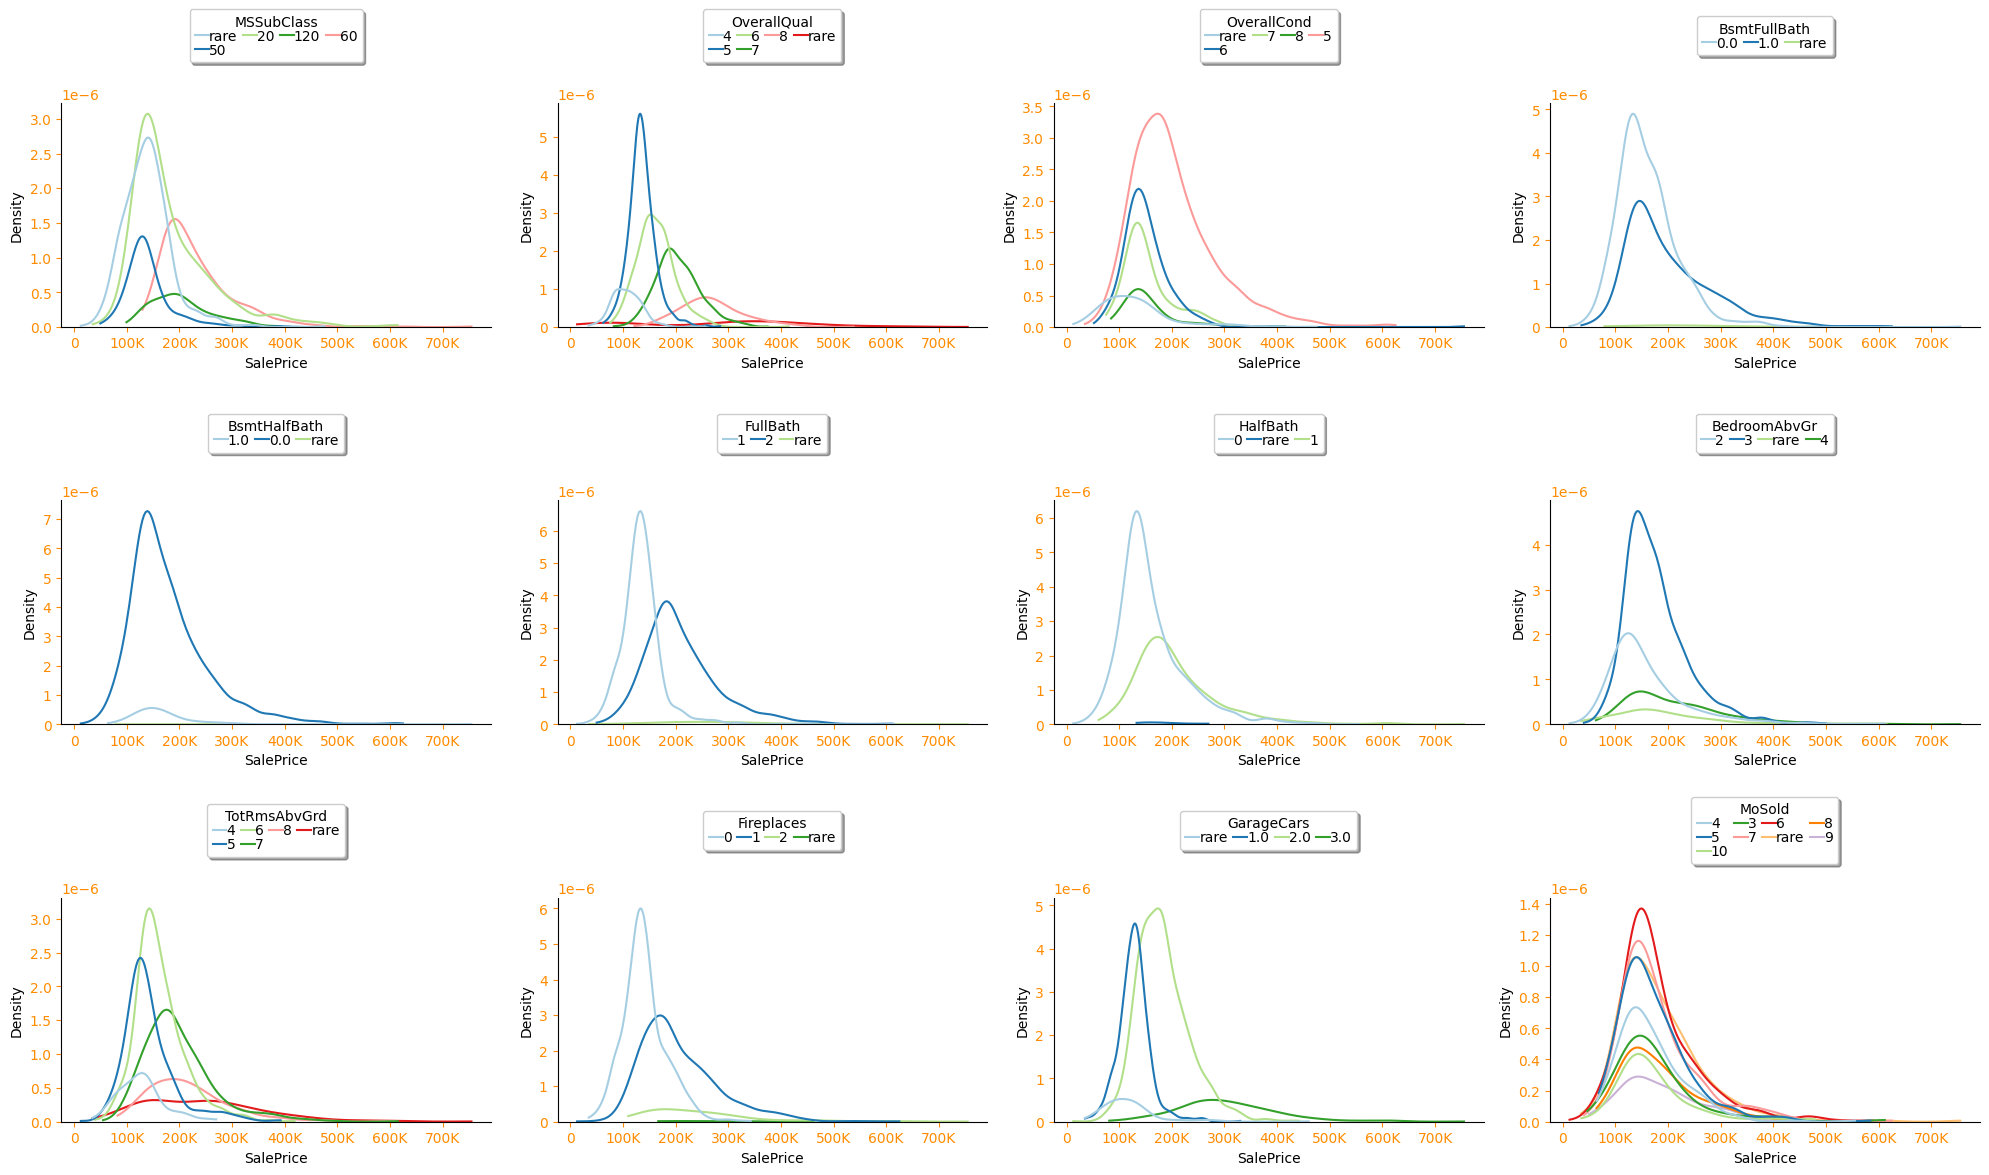

[zaps] **INFO** 29 out of 41 features remaining, to continue plotting press 'Enter' or input any value to exit.


 n


In [22]:
# plotting conditional distributions - Kernel Density iterative plotting with user input
_ = Dist(df = df, cols = cat_cols, target = target, hide_p_bar = True)

_.kd()

[zaps] **INFO** 1 out of 4 columns having null values will not be analyzed


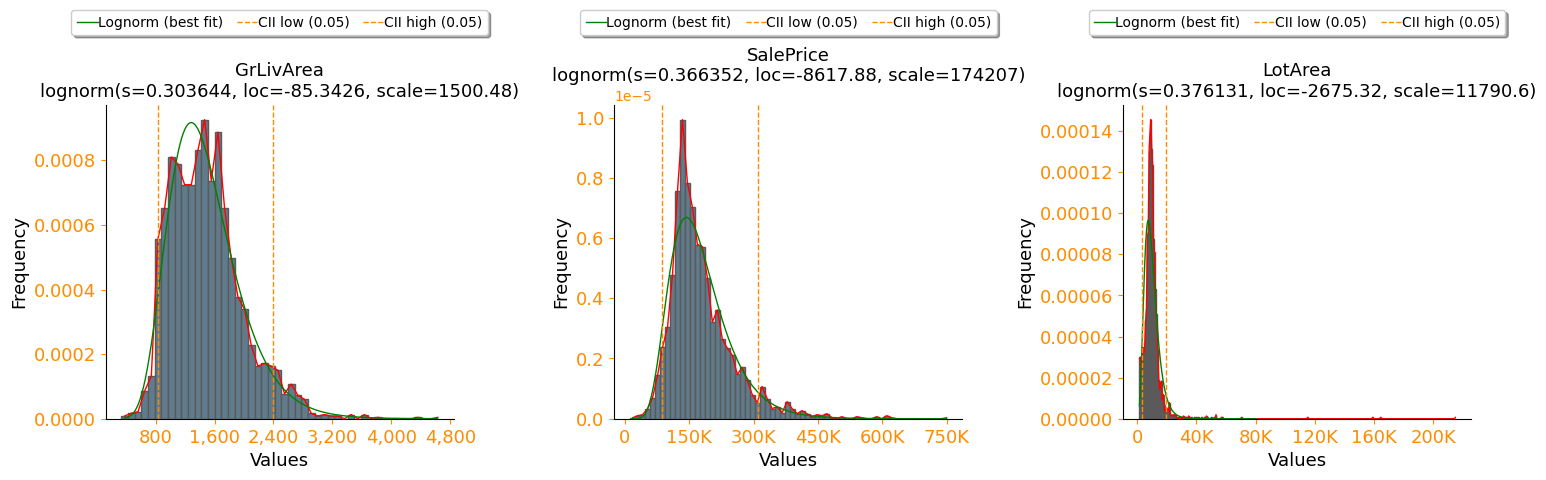

In [23]:
# analysing best fitting distribution
_.best_fit(
            cols = num_cols[1:5],
            distr = ['norm', 'expon', 'lognorm', 'uniform']
          )

# visualize
_.best_vis()

In [24]:
# best fit attribute
_.z_best_fit_results_['SalePrice'].model

{'name': 'lognorm',
 'score': 2.0707792283443192e-11,
 'loc': -8617.87817435356,
 'scale': 174206.76862824793,
 'arg': (0.3663517654533622,),
 'params': (0.3663517654533622, -8617.87817435356, 174206.76862824793),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fc6c88f3550>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 86741.04290022783,
 'CII_max_alpha': 309632.34837928327}

In [25]:
# outliers: identifying and capping - subset of columns
__ = Olrs(num_cols[1:5], hide_p_bar = True)

trans_df = __.fit_transform(df)

[zaps] **INFO** Some columns contain `null` values, these values will be ignored.


In [26]:
# numeric analysis - fitting regression models
n_a = NumAna(df, num_cols[3:], target, hide_p_bar = True).fit_models()

[zaps] **INFO** Mean imputation took place for 11 out of 23 columns having missing values
[zaps] **INFO** Ordinary Least Squares fit will be applied


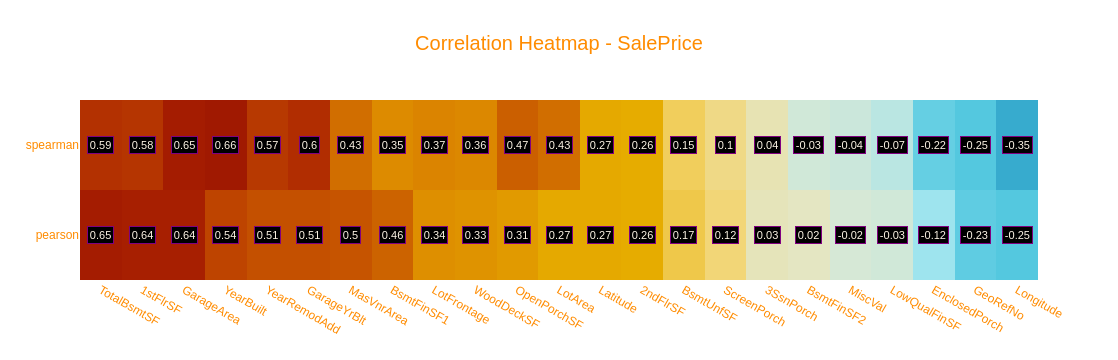

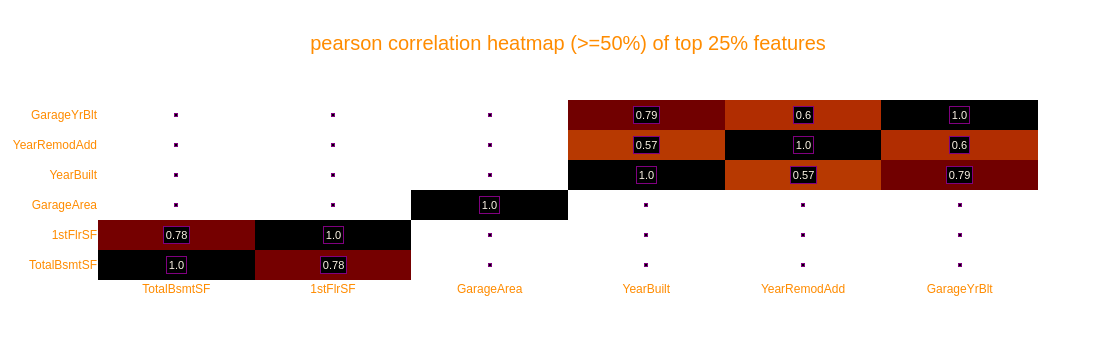

In [27]:
# target and feature correlation - with filtered display
corr_df, feat_corr = n_a.corr(plot = True, thresh = .5)

In [28]:
# attributes
display("feats having nans", n_a.z_nans_,
        "fit results", n_a.z_fit_results_
)

'feats having nans'

array(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'GarageArea',
       'GeoRefNo', 'Latitude', 'Longitude'], dtype=object)

'fit results'

{'LotFrontage': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc6bfb67b90>,
 'LotArea': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc6c4069b10>,
 'YearBuilt': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc6c8696d10>,
 'YearRemodAdd': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc6c4105b10>,
 'MasVnrArea': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc6c40dbb10>,
 'BsmtFinSF1': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc6c4087d10>,
 'BsmtFinSF2': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc6c4106f50>,
 'BsmtUnfSF': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc6bfa14f10>,
 'TotalBsmtSF': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc6c88f2a10>,
 '1stFlrSF': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc6c8924d90>,
 '2ndFlrSF': <statsmodels.regress

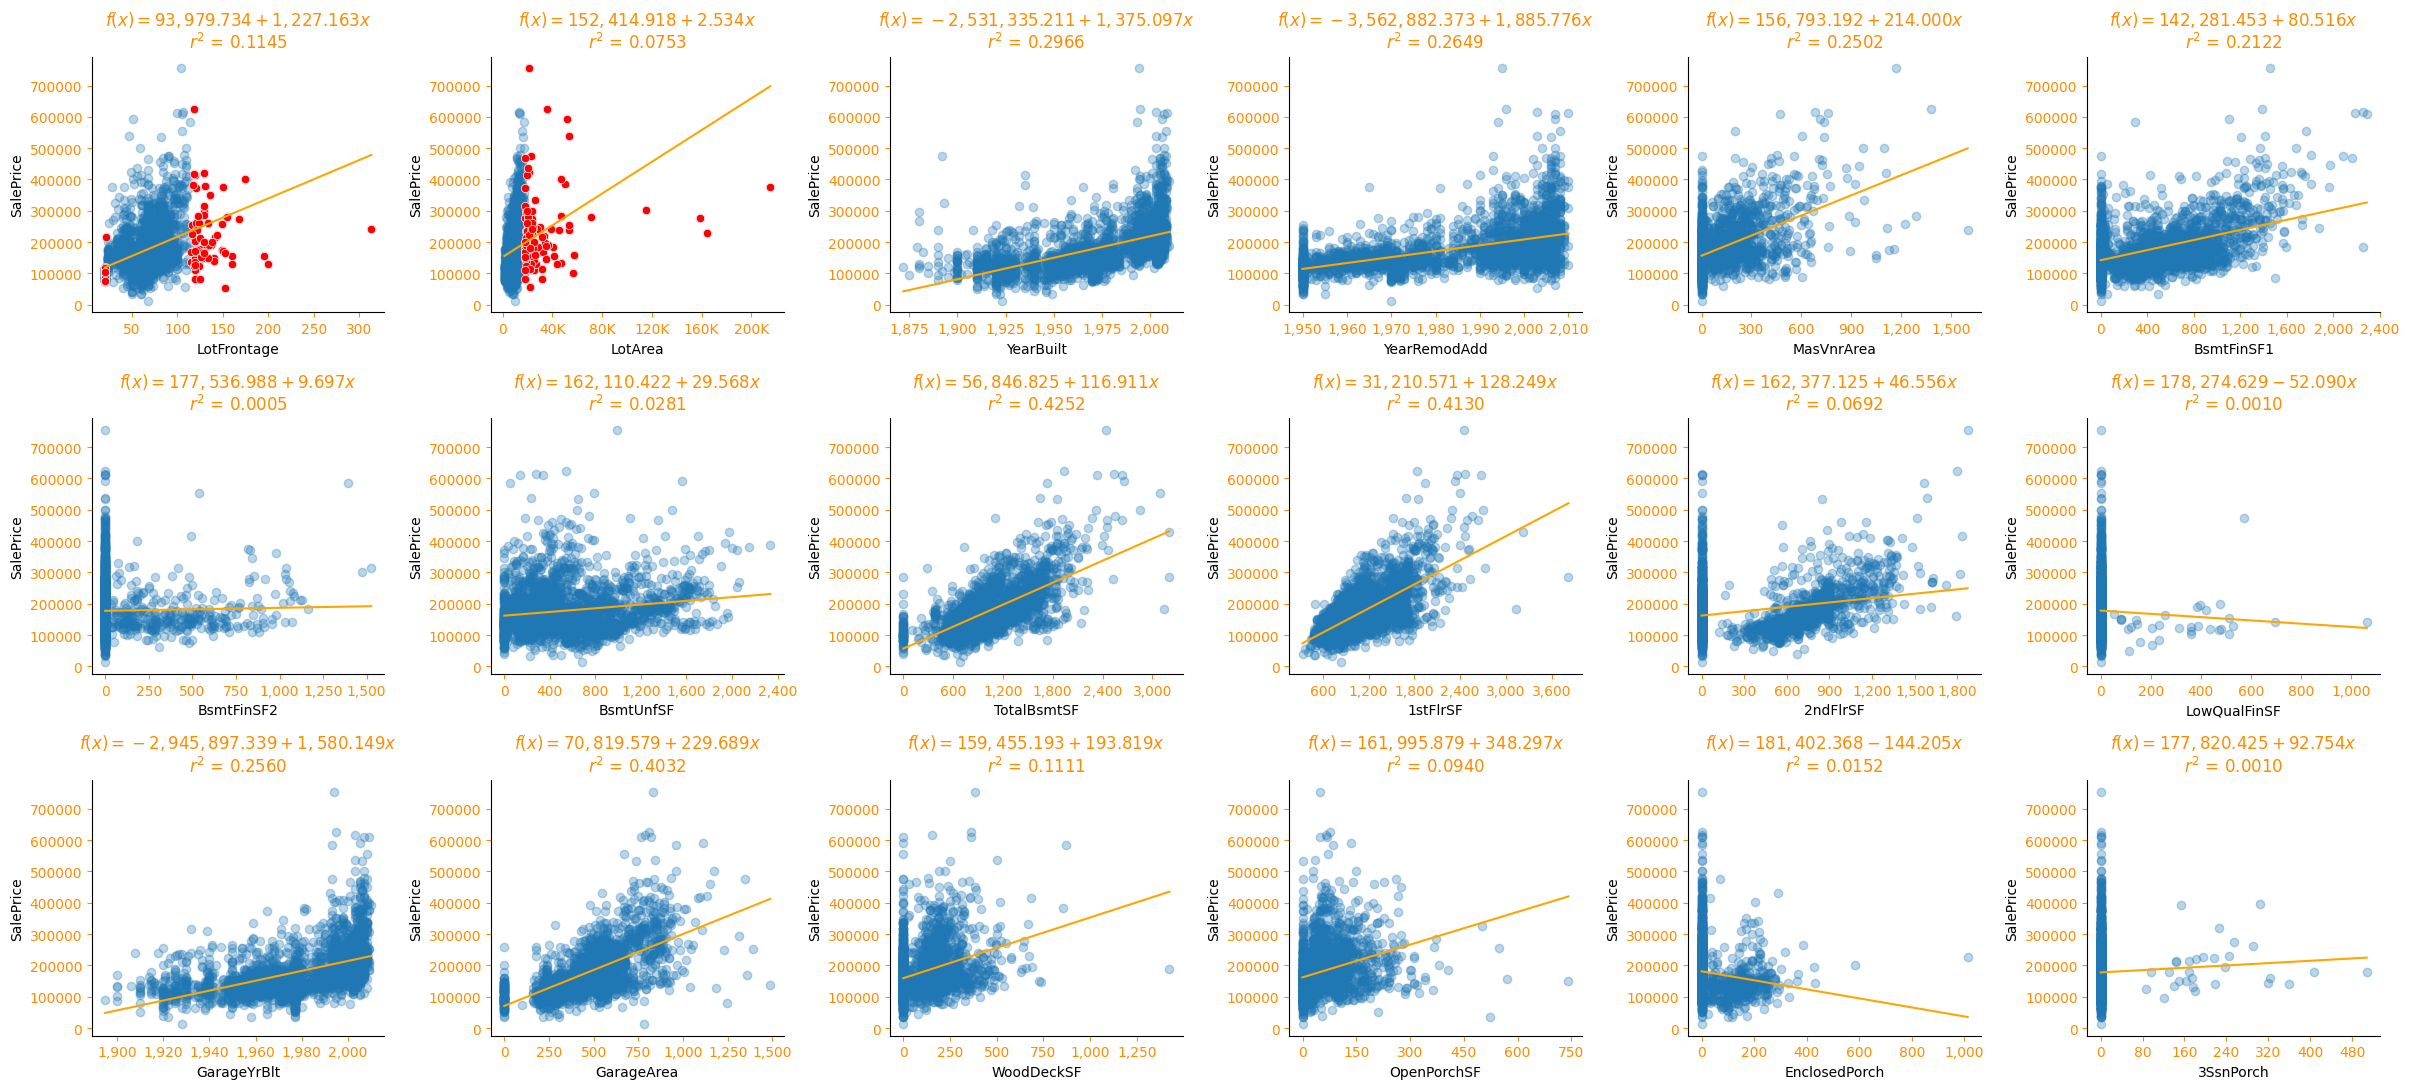

[zaps] **INFO** 5 out of 23 features remaining, to continue plotting press 'Enter' or input any value to exit.


 n


In [29]:
# visualizing trend lines and overlaying outliers on a selected subset
n_a.vis_fit(olrs_mapping = __.z_olrs_)

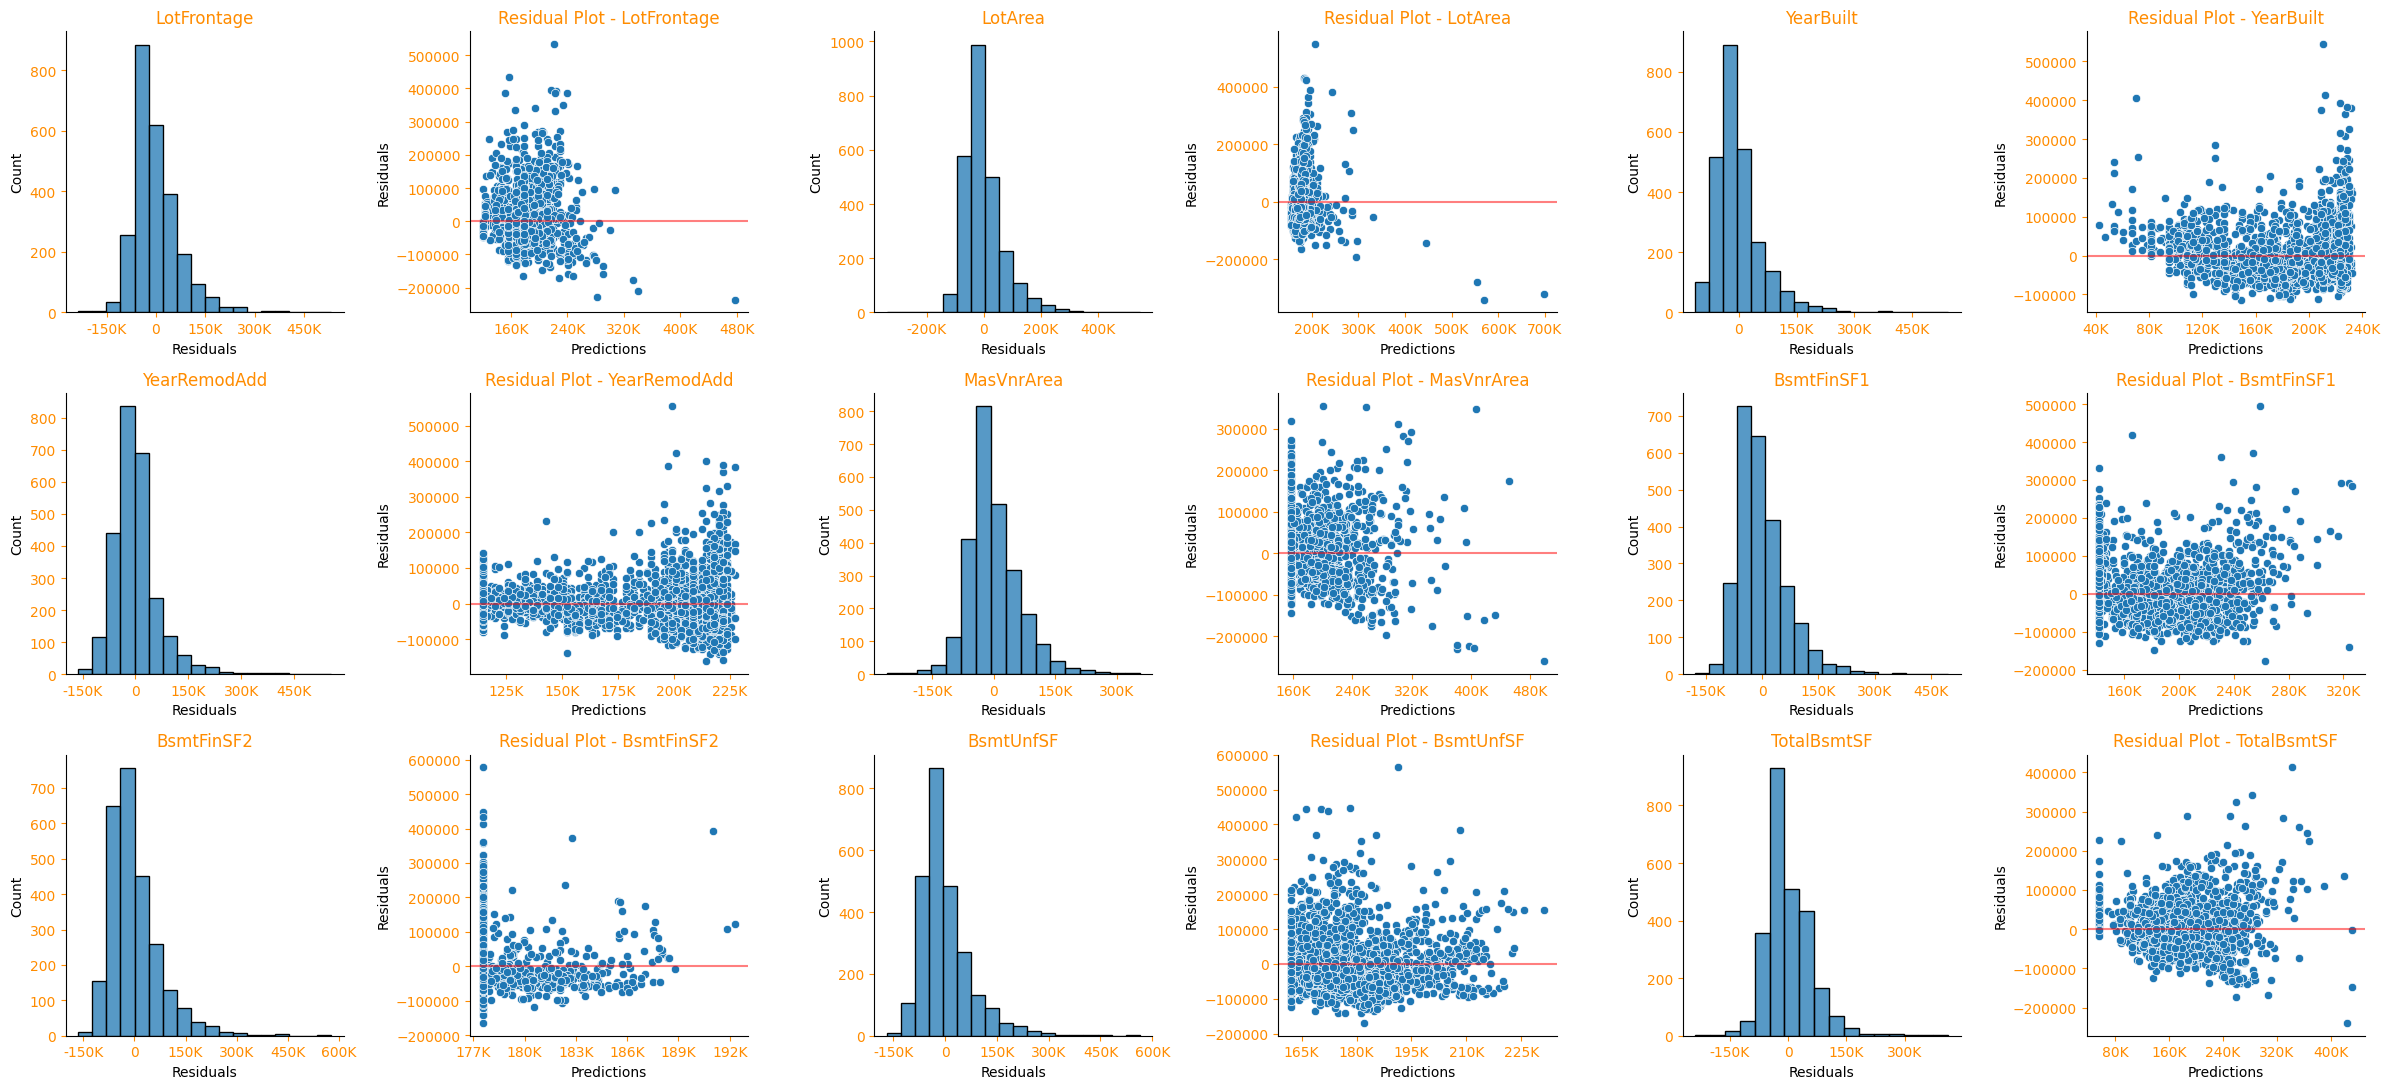

[zaps] **INFO** 14 out of 23 features remaining, to continue plotting press 'Enter' or input any value to exit.


 n


In [30]:
# assess fit results visually
n_a.vis_ols_fit()

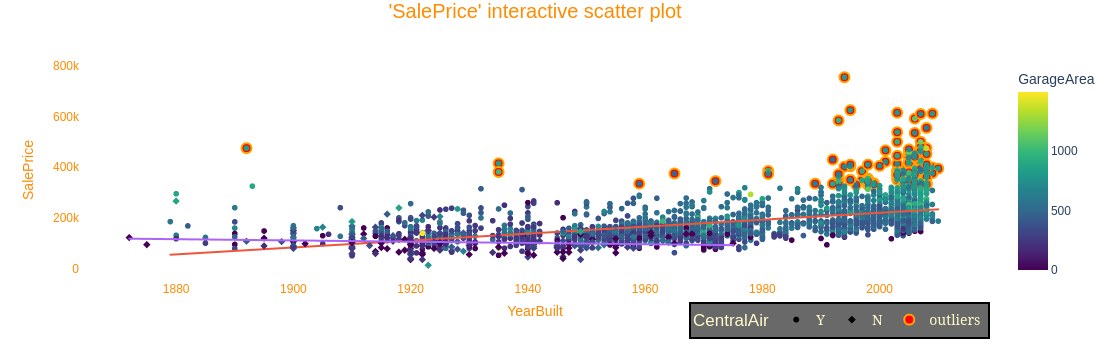

In [31]:
# interactive multivariate analysis
n_a.vis_multi(col = 'YearBuilt', color = 'GarageArea', symbol = 'CentralAir', 
              trendline = 'ols', olrs_idx = __.z_olrs_['SalePrice'])

In [32]:
# categorical analysis - ANOVA with assumptions and mutual info scores
c_a = CatAna(df, cat_cols, target, hide_p_bar = True)

anova = c_a.ana_owva()

[zaps] **INFO** Columns are assumed to be Categorical. If not correct, please manually set 'cat_cols' parameter
[zaps] **WARNING** 18 out of 59 Features Will Not Be Analyzed Being Dominated By Rare Levels. This behaviour is controled by 'rare_thresh' parameter


'** One-way ANOVA / Kruskal-Wallis H and their related assumptions assessment **'

'Note: `False` means Reject Null; there is at least one group/lvl with mean/median differences that are statistically significant'

In [33]:
# Post-hoc displaying groups that could be merged
post_hoc = c_a.ana_post(multi_tst_corrc = 'bonf')

[zaps] **INFO** 1 Feature(s) Having Only 2 Frequent Levels Were Excluded From Post Hoc Analysis


'** Post-hoc results using `bonf` correction for groups/lvls having no significant results **'

'Note: `False` means Accept Null; difference in conditional distribution given these groups/lvls is not statistically significantl'

In [34]:
# categorical analysis attributes
display(
        "features not analyzed - ANOVA", c_a.xludd_feats_,
        "features not analyzed - Post-Hoc", c_a.xludd_phoc_feats_,
        "Mean variation: Conditional vs Prior", c_a.zefct_df_
)

'features not analyzed - ANOVA'

array(['KitchenAbvGr', 'PoolArea', 'Street', 'Alley', 'LandContour',
       'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond',
       'BsmtFinType2', 'Heating', 'Functional', 'PoolQC', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Prop_Addr'], dtype='<U13')

'features not analyzed - Post-Hoc'

array(['CentralAir'], dtype='<U12')

'Mean variation: Conditional vs Prior'

feature      lvl      SalePrice         prior           diff  \
142   KitchenQual       Ex  333833.056338  178053.44242  155779.613918   
117      BsmtQual       Ex  327308.005319  178053.44242  149254.562900   
44     GarageCars      3.0  305562.361404  178053.44242  127508.918984   
109     ExterQual     rare  294635.708738  178053.44242  116582.266318   
10    OverallQual     rare  281597.493243  178053.44242  103544.050824   
..            ...      ...            ...           ...            ...   
157  GarageFinish  missing  106814.604651  178053.44242  -71238.837768   
159    GarageQual  missing  106814.604651  178053.44242  -71238.837768   
162    GarageCond  missing  106814.604651  178053.44242  -71238.837768   
141    Electrical     rare  104732.170213  178053.44242  -73321.272207   
137    CentralAir        N  103607.257669  178053.44242  -74446.184751   

        ratio  
142  1.874904  
117  1.838257  
44   1.716127  
109  1.654760  
10   1.581534  
..        ...  
157  0.599902  
159  0.599902  
162  0.599902  
141  0.588206  
137  0.581889  

[170 rows x 6 columns]

### Sklearn Pipeline

In [35]:
# sklearn pipline integration

# setup
feats = ['GrLivArea', '1stFlrSF']

lrs = Olrs(cols = feats, hide_p_bar = True)
poly = PolynomialFeatures(interaction_only = True, include_bias = False).set_output(transform = "pandas")

# pipline
pl = Pipeline([
    ('pf', poly),
    ('olrs', lrs),
    ])

# check results
display(
    "transformed data", pl.fit_transform(df[feats]),
    "Capping threshold", pl[-1].z_thrsh_df_
)

'transformed data'

GrLivArea  1stFlrSF  GrLivArea 1stFlrSF  GrLivArea_b_winso  \
0         856.0     856.0            732736.0              856.0   
1        1049.0    1049.0           1100401.0             1049.0   
2        1001.0    1001.0           1002001.0             1001.0   
3        1039.0     717.0            744963.0             1039.0   
4        1665.0     810.0           1348650.0             1665.0   
...         ...       ...                 ...                ...   
2574      952.0     952.0            906304.0              952.0   
2575     1733.0    1733.0           3003289.0             1733.0   
2576     2002.0    1001.0           2004002.0             2002.0   
2577     1842.0     985.0           1814370.0             1842.0   
2578     1911.0    1065.0           2035215.0             1911.0   

      1stFlrSF_b_winso  
0                856.0  
1               1049.0  
2               1001.0  
3                717.0  
4                810.0  
...                ...  
2574             952.0  
2575            1733.0  
2576            1001.0  
2577             985.0  
2578            1065.0  

[2579 rows x 5 columns]

'Capping threshold'

GrLivArea 1stFlrSF
method         iqr      iqr
distance       1.5      1.5
lower        180.5   132.75
upper       2664.5  2102.75